# Prediction-of-Wine-Quality

# Importing Libraries

In [249]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [250]:
wine = pd.read_csv("../Assignment3/winequality-red.csv")
print("Successfully imported data!")
wine.head() #To view initial 5 rows of data

Successfully imported data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Insights

In [251]:
print(wine.shape) #Count of Rows and Coloumns

(1599, 12)


- dataset comprises of 1599 observations and 12 chracteriestics
- out of which one is dependent variable and rest 11 are independent variables - physicochemical characteristics

In [252]:
wine.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Data has only float and integer values
- No variable column has null/missing values

# Summary Statistics

In [253]:
wine.describe(include='all') #Recommended to use it in a dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [254]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Understanding Target variable

In [255]:
wine.quality.unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

- Target variable/Dependent variable is discrete and categorical in nature.
- "quality" score scale ranges from 1 to 10;where 1 being poor and 10 being the best.
- 1, 2, 9 & 10 Quality ratings are not given by any obseravtion.Only scores obtained are between 3 to 8.

In [256]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- This tells us vote count of each quality score in descending order.
- "quality" has most values concentrated in the categories 5, 6 and 7.
- Only a few observations made for the categories 3 & 8

Text(0.5, 1.0, 'Wine distribution by quality')

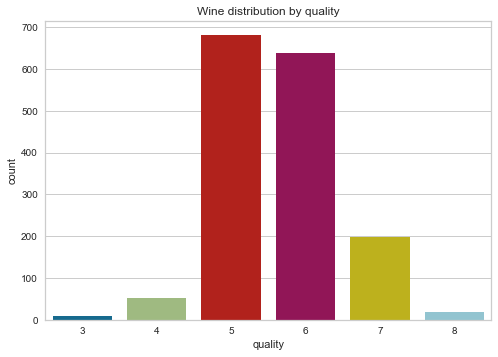

In [291]:
sns.countplot(x="quality", data=wine).set_title("Wine distribution by quality")

# Data Visualization

# To check missing values

<AxesSubplot:>

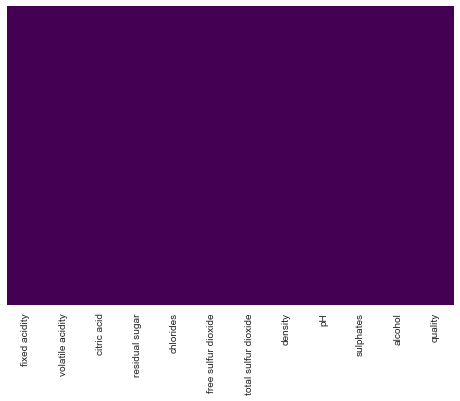

In [258]:
sns.heatmap(wine.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

- Dataset has no missing values.
- If there were any, you would've noticed in figure represented by different colour shade on purple background.

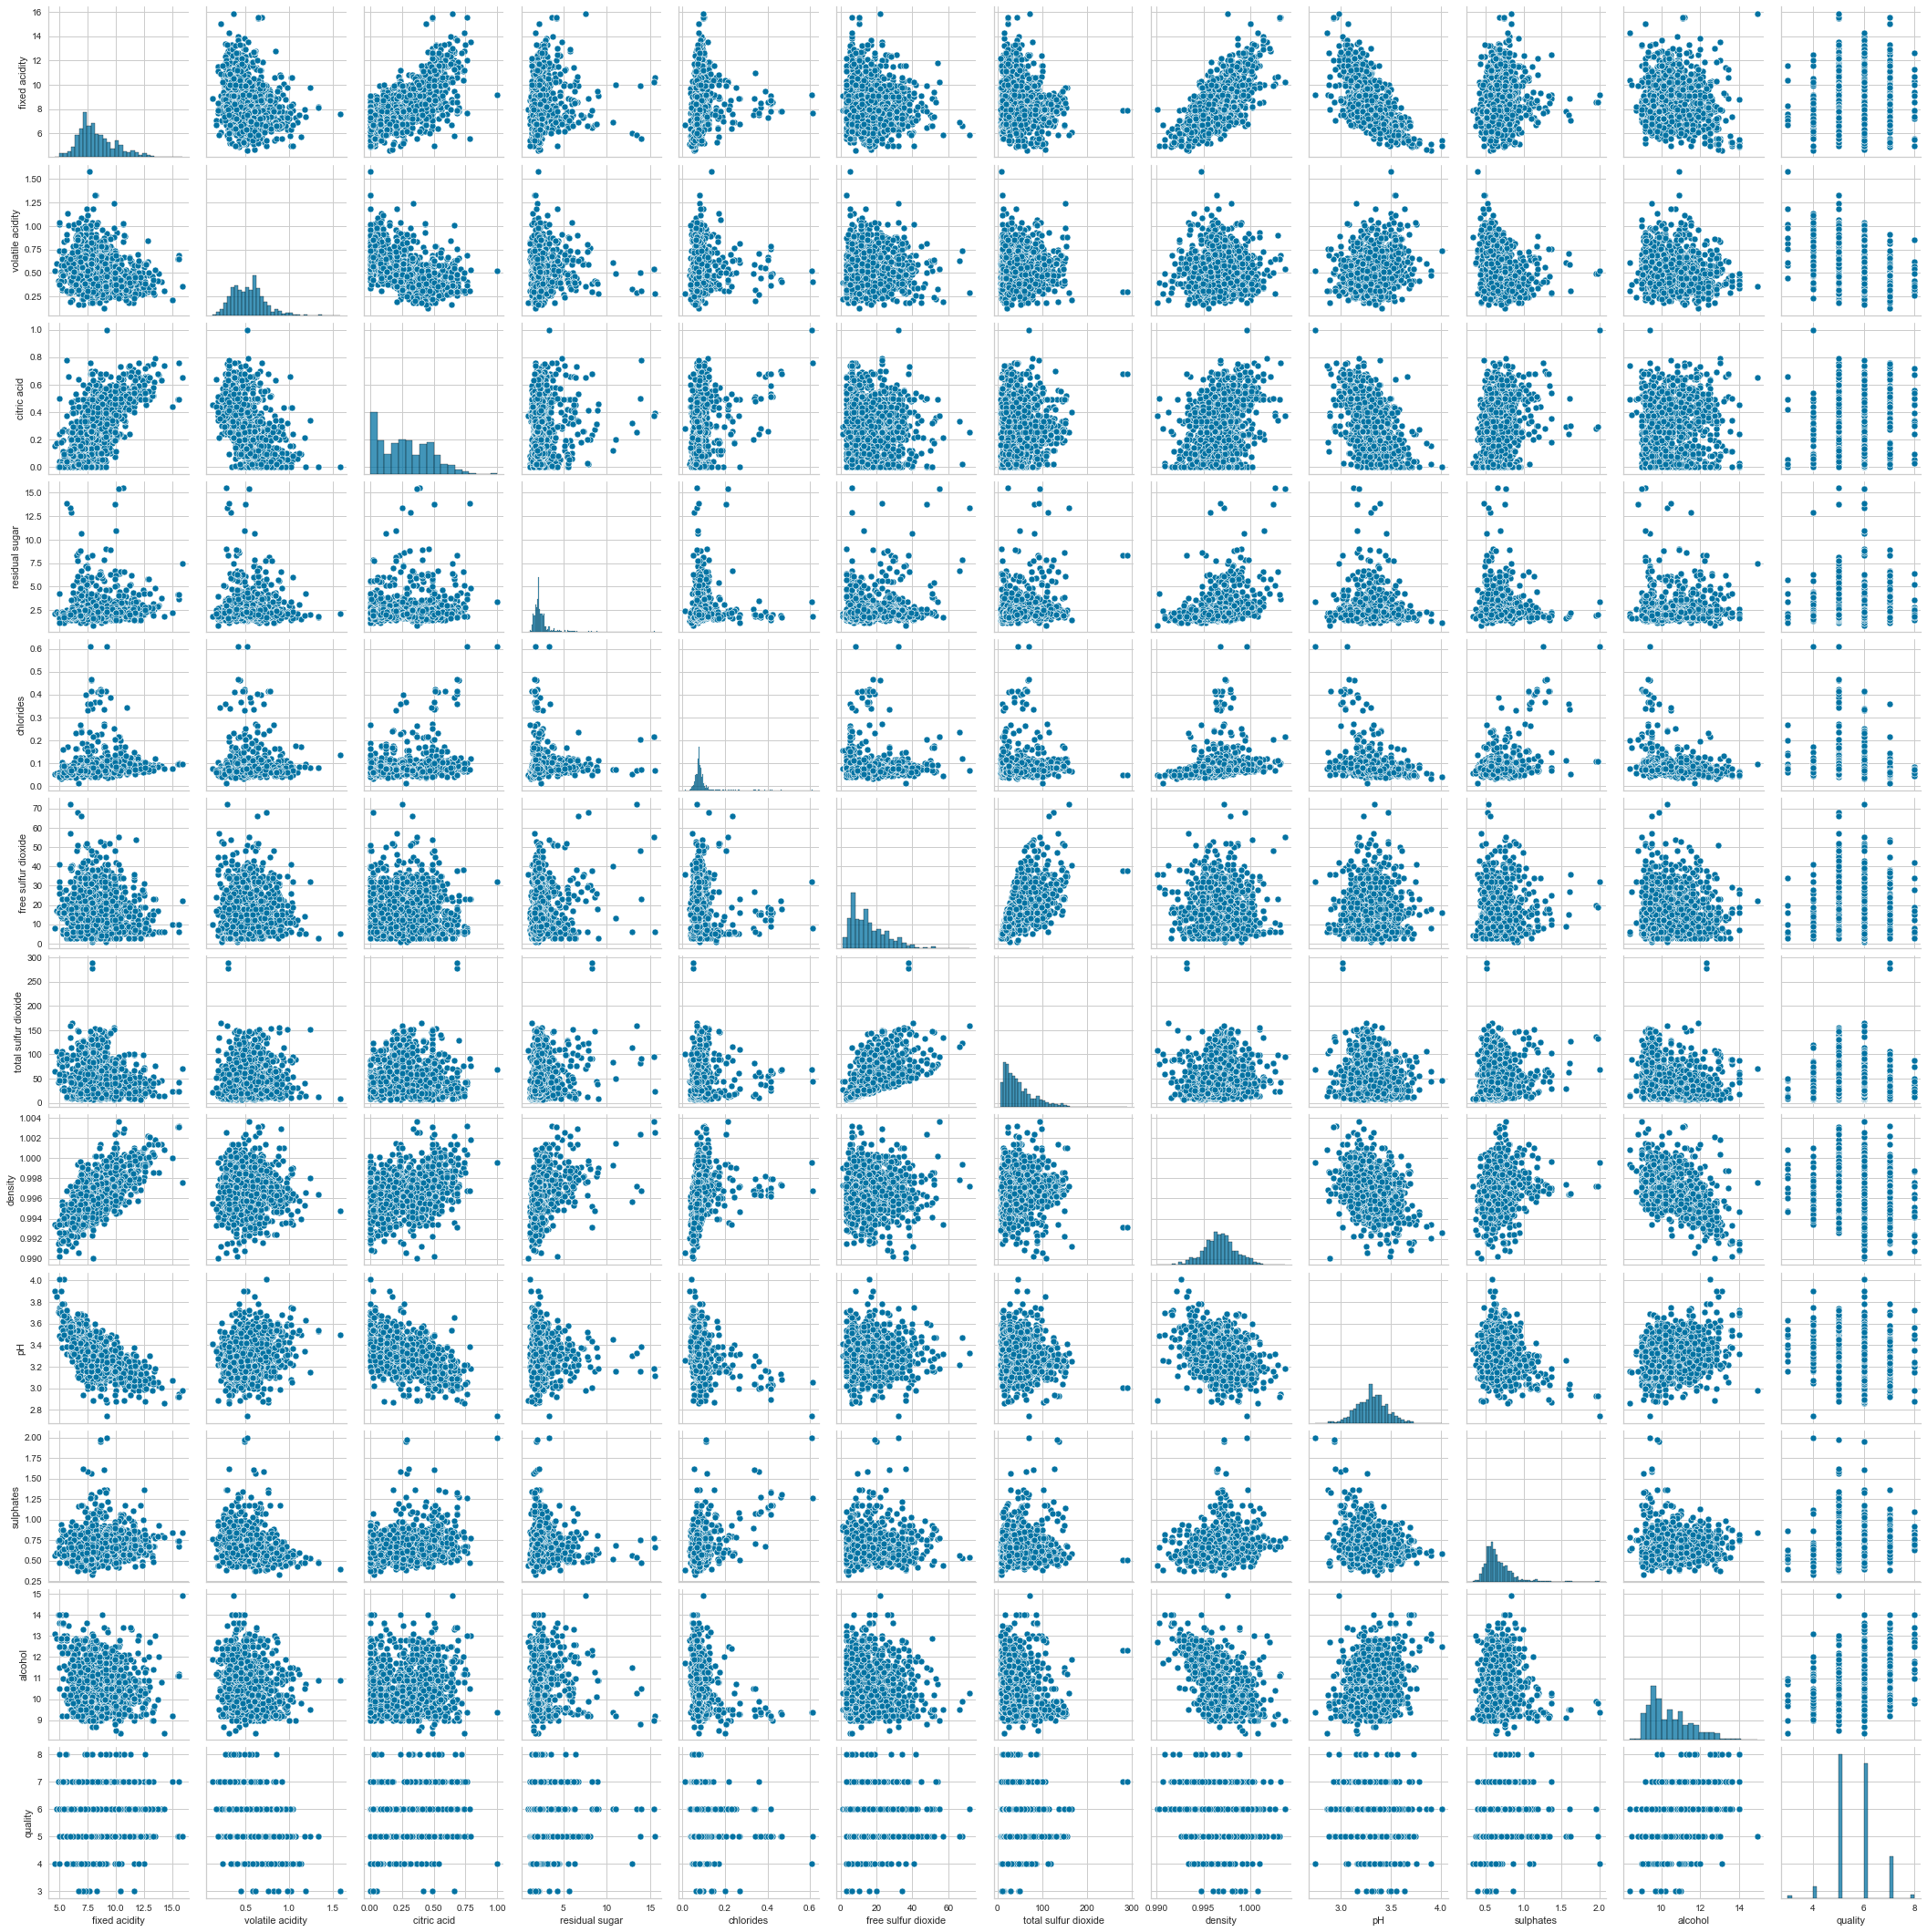

In [259]:
sns.pairplot(wine)

In [260]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


# Data Analysis

Countplot:

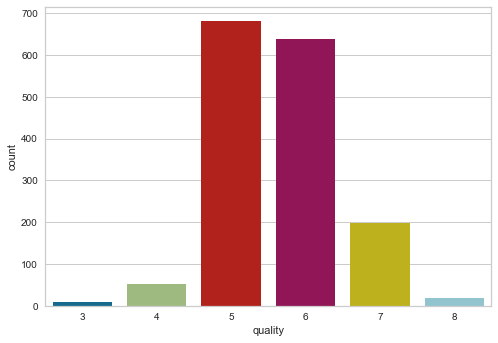

In [261]:
sns.countplot(wine['quality'])
plt.show()

<AxesSubplot:xlabel='pH', ylabel='count'>

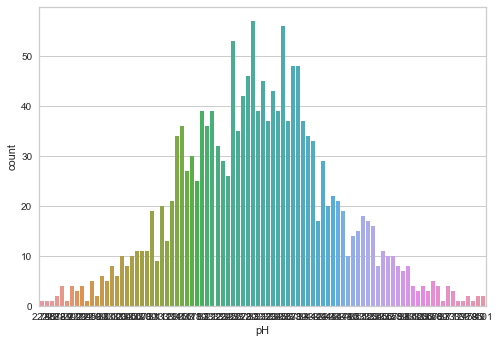

In [262]:
sns.countplot(wine['pH']) 


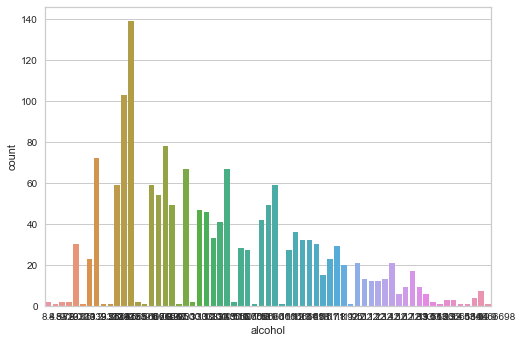

In [263]:
sns.countplot(wine['alcohol'])
plt.show()

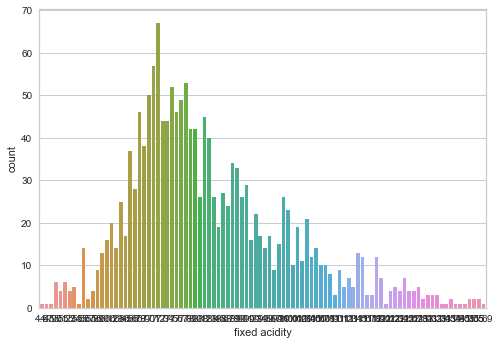

In [264]:
sns.countplot(wine['fixed acidity'])
plt.show()

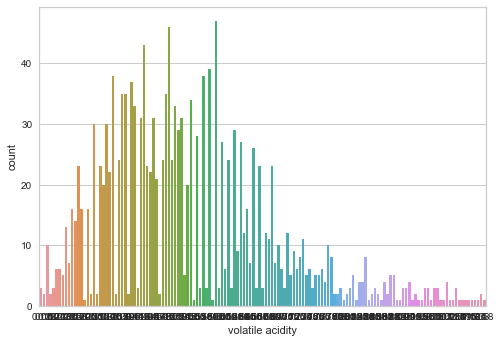

In [265]:
sns.countplot(wine['volatile acidity'])
plt.show()

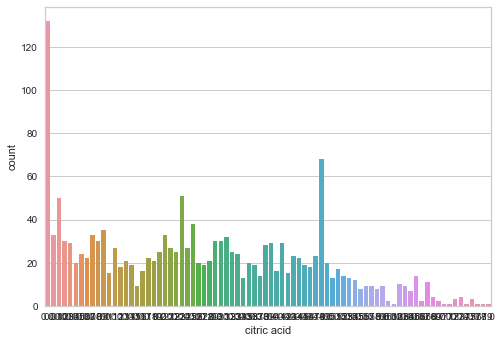

In [266]:
sns.countplot(wine['citric acid'])
plt.show()

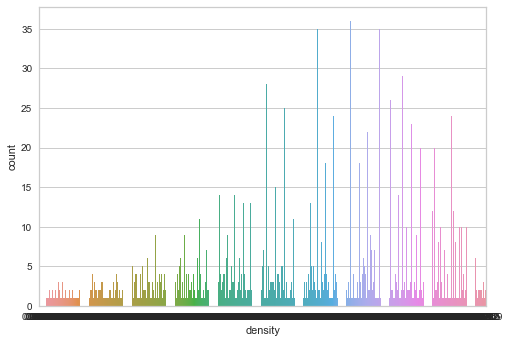

In [267]:
sns.countplot(wine['density'])
plt.show()

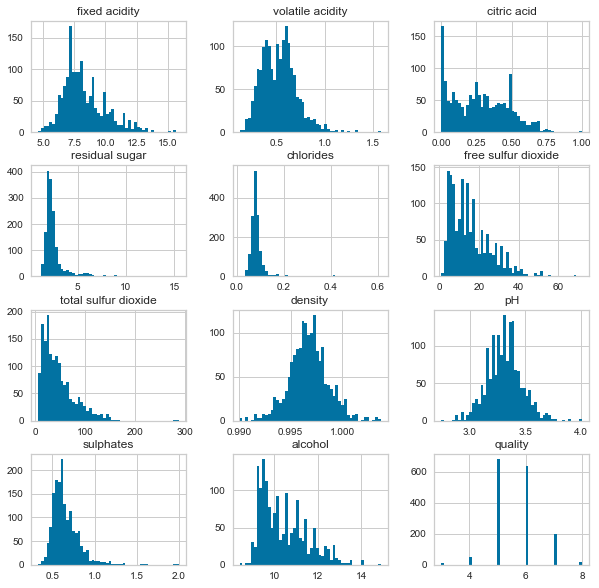

In [268]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

# Feature Selection

In [269]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [270]:
# See proportion of good vs bad wines
wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [271]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [272]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


In [273]:
correlations = wine.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
goodquality             0.710196
Name: quality, dtype: float64


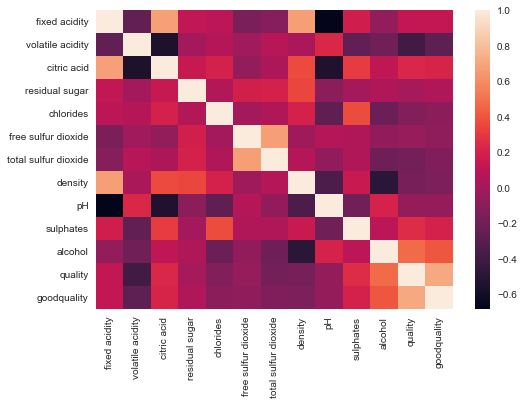

In [274]:
sns.heatmap(wine.corr())
plt.show()

In [275]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [276]:
# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)
x = wine[features]
y = wine['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'goodquality']


# Splitting Dataset

In [277]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3,random_state=101)

# Linear Regression Results before PCA

In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time
startTime = time.time()

lm=LinearRegression()
lm.fit(X_train,y_train)


#Train the model using the training sets 
rfc.fit(X_train,y_train)


#Perform prediction on the test set
y_pred=rfc.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("R2 Score :" ,r2_score(y_test,y_pred)) 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Calculating Execution Time
import time
endTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(endTime), 'seconds')


Accuracy:  0.984375
R2 Score : 0.9413225005642067
MAE: 0.021875
MSE: 0.040625
RMSE: 0.20155644370746376
Execution time in seconds: 0.410616397857666 seconds


In [280]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Metrics :")
print(confusion_matrix(y_test, y_pred))

print('F1 Score: ', f1_score(y_test, y_pred, average='micro'))
print("R2 score:", r2_score(y_test, y_pred))
print('Precision Score:', metrics.precision_score(y_test, y_pred, average="micro"))



Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        34
           5       0.63      0.81      0.71       473
           6       0.61      0.58      0.60       458
           7       0.60      0.35      0.44       136
           8       0.33      0.08      0.12        13

    accuracy                           0.62      1119
   macro avg       0.36      0.30      0.31      1119
weighted avg       0.60      0.62      0.60      1119

Confusion Metrics :
[[  0   0   4   1   0   0]
 [  0   0  25   8   1   0]
 [  0   1 382  84   6   0]
 [  0   0 174 265  19   0]
 [  0   0  17  69  48   2]
 [  0   0   1   5   6   1]]
F1 Score:  0.6219839142091153
R2 score: 0.19376920359559957
Precision Score: 0.6219839142091153


<AxesSubplot:xlabel='Actual', ylabel='Predictions'>

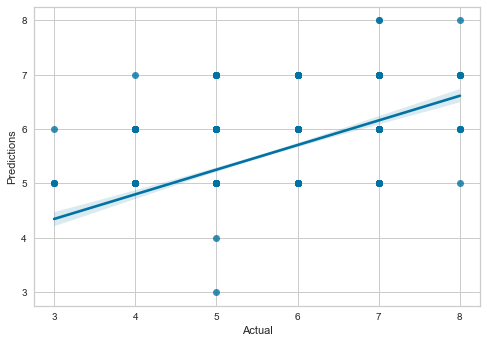

In [320]:
sns.regplot('Actual','Predictions',data=df)

In [313]:
#We want the value of RMSE to be as low as possible, as lower the RMSE value is, the better the model is with its predictions

# Linear regression with PCA

In [359]:
#Importing libraries from SKLEARN

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

In [360]:
#loading Wine dataset
wine = datasets.load_wine()

X = wine.data
y = wine.target
target_names = wine.target_names

pca = PCA(n_components=13)
wine_X = pca.fit(X).transform(X)

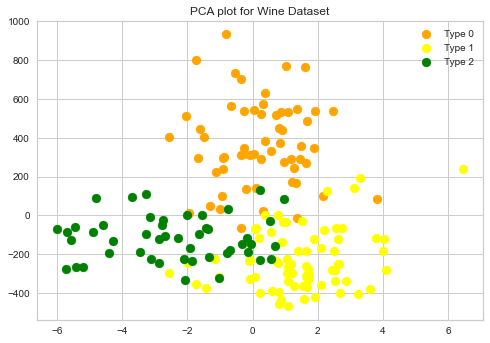

In [361]:
plt.scatter(wine_X[y == 0, 3], wine_X[y == 0, 0], s =80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[y == 1, 3], wine_X[y == 1, 0], s =80,  c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[y == 2, 3], wine_X[y == 2, 0], s =80,  c = 'green', label = 'Type 2')
plt.title('PCA plot for Wine Dataset')
plt.legend()

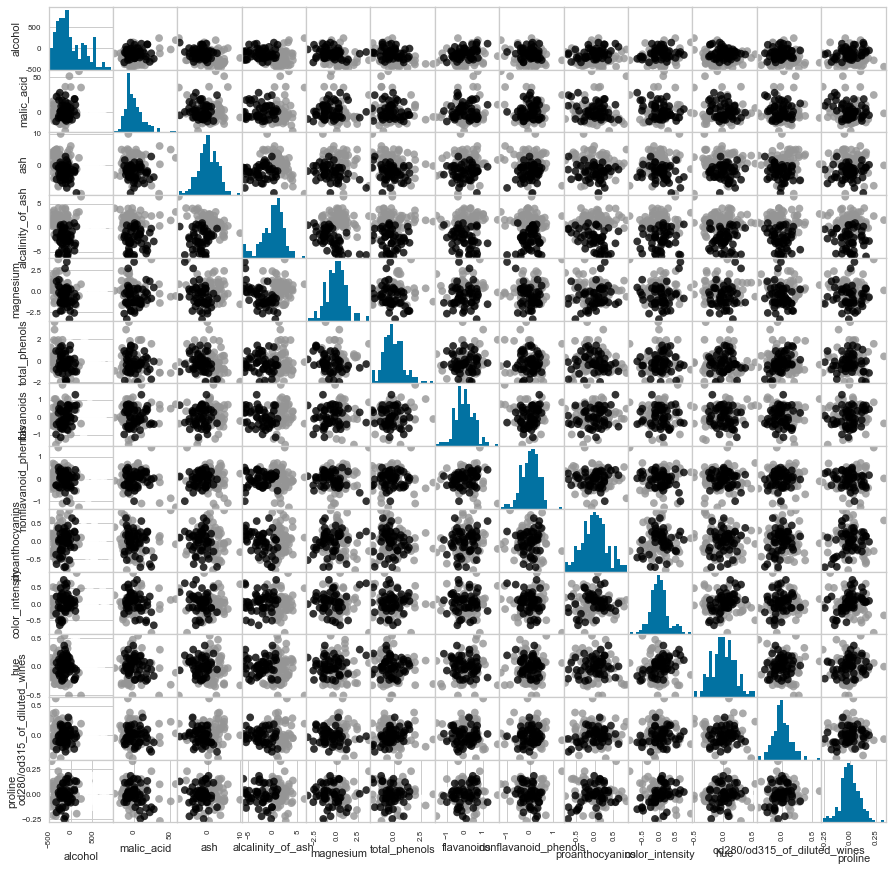

In [362]:
import pandas as pd

wine_dataframe = pd.DataFrame(wine_X, columns=wine.feature_names)

# Create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(wine_dataframe, c=y, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

 (Wine Quality Prediction with PCA & LDA Algorithms, n.d.)

# Random Forest before PCA

In [296]:
import time
startTime = time.time()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


#Calculating Execution Time
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime), 'seconds')



Accuracy:  0.9875
Execution time in seconds: 0.24863648414611816 seconds


(Sharma, 2021)

# K-means before PCA

Execution time in seconds: 1.1941156387329102 seconds


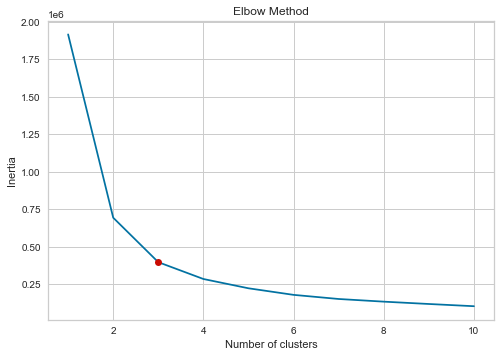

In [285]:
import time
startTime = time.time()
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Elbow Method
seed = 0
elbow = dict()
for k in range(1,11):
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(wine)
    inertia = estimator.inertia_
    elbow[k] = inertia
    
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(3,elbow_df[3],'ro')

#Calculating Execution Time
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime), 'seconds')

From the figure above, we can see that when the number of cluster is 3, it's hard to tell whether adding another cluster can improve much better the inertia or not.

In [286]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=30).fit(wine)
clusters3

KMeans(n_clusters=3, random_state=30)

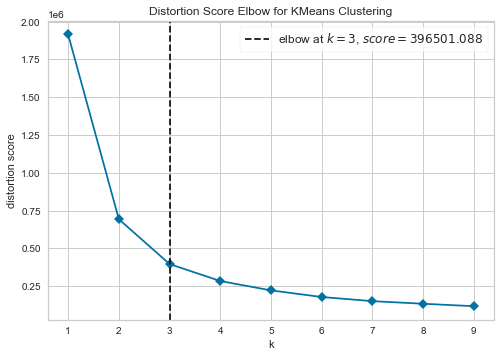

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [322]:
#! pip install yellowbrick  
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(wine)
visualizer.show()

For cluster: 3, the silhouette score is: 0.5181521944413612
For cluster: 4, the silhouette score is: 0.4839166853381961
For cluster: 5, the silhouette score is: 0.4442593431504444
For cluster: 6, the silhouette score is: 0.4458582482184656
For cluster: 7, the silhouette score is: 0.398309777351374
For cluster: 8, the silhouette score is: 0.3783541710060491
For cluster: 9, the silhouette score is: 0.37362935823620336


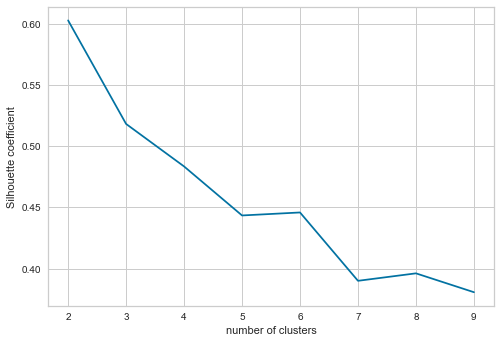

In [288]:
for i in range(3,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(wine)
    score = silhouette_score(wine, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))
    
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(wine)
    score = silhouette_score(wine, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()


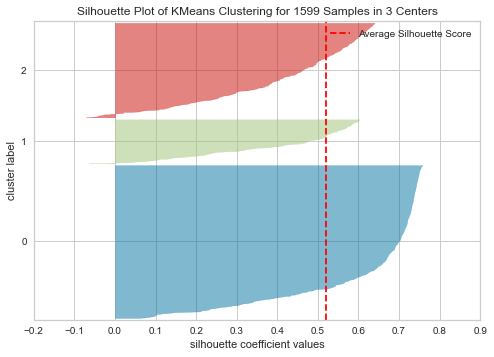

For n_clusters = 3 The average silhouette_score is : 0.5197993902451671


In [326]:
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import silhouette_score
n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
silhouette_visualizer(KMeans(n_clusters=n_clusters, random_state=42), X, colors='yellowbrick')
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)



From the figure above, we can see that when the number of cluster is 3, average silhouette score is maximized.
Thus optimal cluster for k-means clustering is 3.

# K-means applying PCA

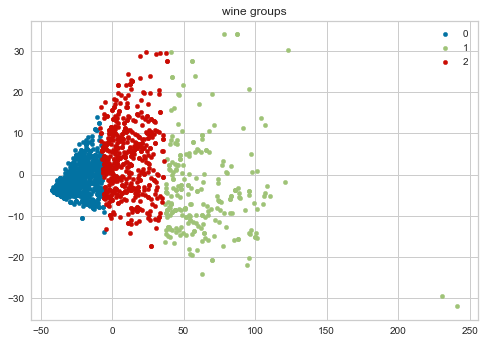

In [289]:
pca = PCA()
X = pca.fit_transform(wine)

kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)
    
plt.legend()
plt.title('wine groups')
plt.show()

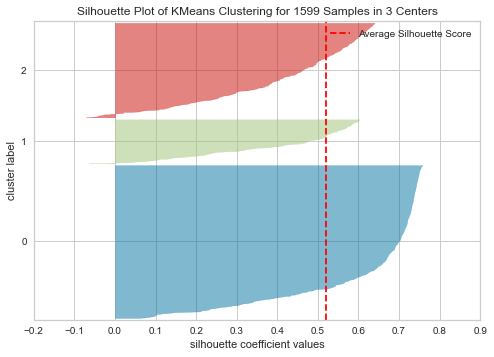

For n_clusters = 3 The average silhouette_score is : 0.5197993902451671


In [331]:
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import silhouette_score
n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
silhouette_visualizer(KMeans(n_clusters=n_clusters, random_state=42), X, colors='yellowbrick')
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

# Conclusion

According to the activity, it gives a great opportunity to study and understand various alogirthms used for data analysis.
1) Linear regression (supervised)
2) Random forest classification (supervised)
3) K-means clustering (unsupervised)
Also with Principal component analysis (PCA) to compute the principal components and using them to perform a change of basis on the dataset.

# Reference

Wine Quality Prediction with PCA & LDA Algorithms. (n.d.). Kaggle.com. Retrieved November 23, 2022, from https://www.kaggle.com/code/armagansarikey/wine-quality-prediction-with-pca-lda-algorithms/notebook

Sharma, S. K. (2021, June 13). Wine-Quality. GitHub. https://github.com/shsarv/Wine-Quality-prediction/blob/master/Wine.ipynb